## Моделювання процесу CIR

1. Змоделювати розв'язок рівняння методами Ейлера та Мільштейна (вручну та за допомогою вбудованої функції):
$dX_t = 2X_t dt + \sqrt{X_t}dB_t$, $X_0 = x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Спочатку згадаємо метод Ейлера. Через $Y_t$ позначимо наближення $X_t$.
$Y_0 = X_0$, $Y_{t_k} = Y_{t_{k-1}} + 2Y_{t_{k-1}}(t_k - t_{k-1}) + \sqrt{Y_{t_{k-1}}}\xi_k$, $\xi \sim N(0, \delta_k)$, $\delta_k = \sqrt{t_k - t_{k-1}} = \sqrt{T/n}$
Для простоти вважаємо, що $T = 1$.

In [2]:
def euler_method(x0, n):
    y = np.empty(n+1)
    y[0] = x0
    d = 1 / n
    for j in range(1, n+1):
        w = np.random.normal(loc=0, scale=1, size=1)
        # abs(...) у разі початкового значення x0 < 0
        y[j] = y[j-1] + 2 * y[j-1] * d + np.sqrt(np.abs(y[j-1])) * w
    return y

In [5]:
np.random.seed(999)

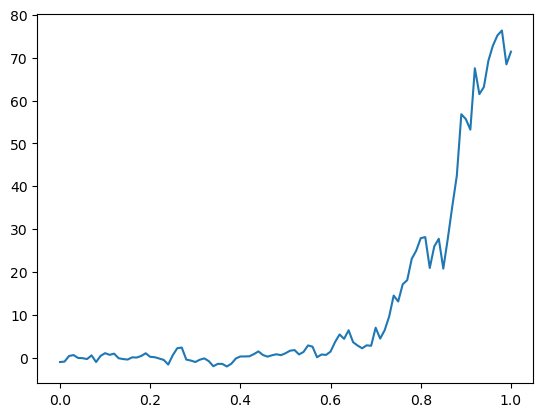

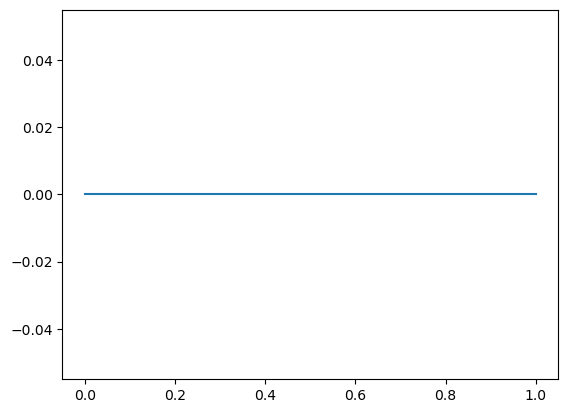

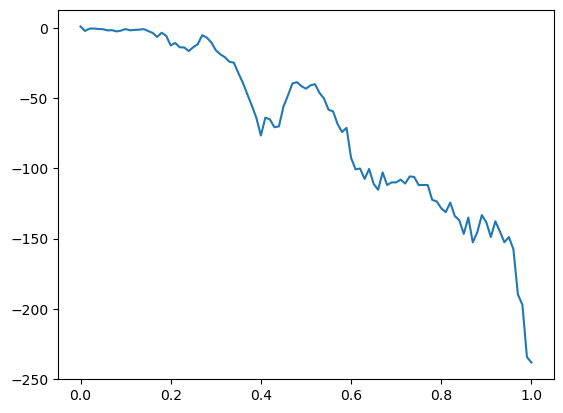

In [6]:
n = 100
times = np.arange(0, n+1) / n
plt.plot(times, euler_method(x0=-1, n=n))
plt.show()
plt.plot(times, euler_method(x0=0, n=n))
plt.show()
plt.plot(times, euler_method(x0=1, n=n))
plt.show()

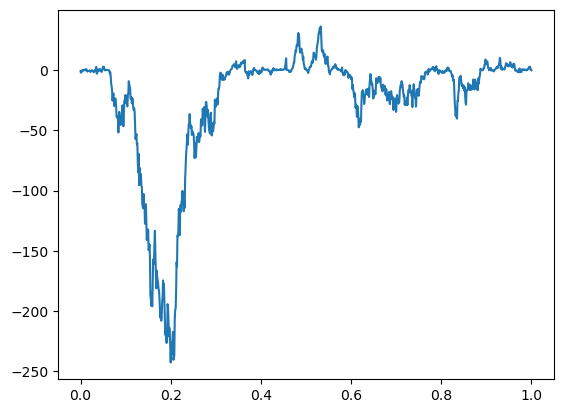

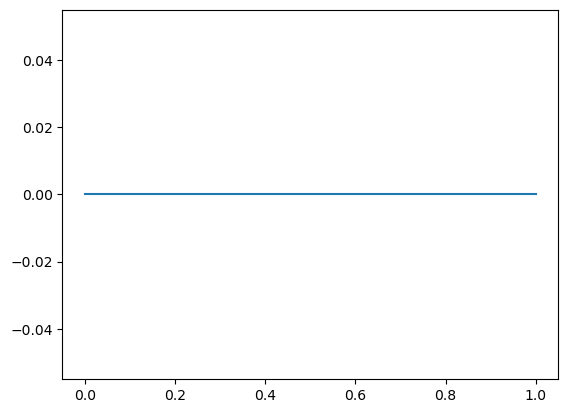

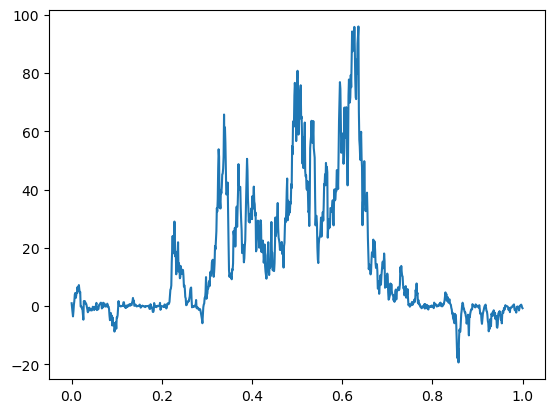

In [7]:
n = 1000
times = np.arange(0, n+1) / n
plt.plot(times, euler_method(x0=-1, n=n))
plt.show()
plt.plot(times, euler_method(x0=0, n=n))
plt.show()
plt.plot(times, euler_method(x0=1, n=n))
plt.show()

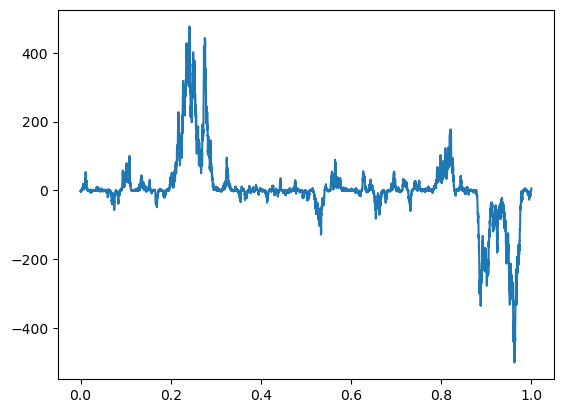

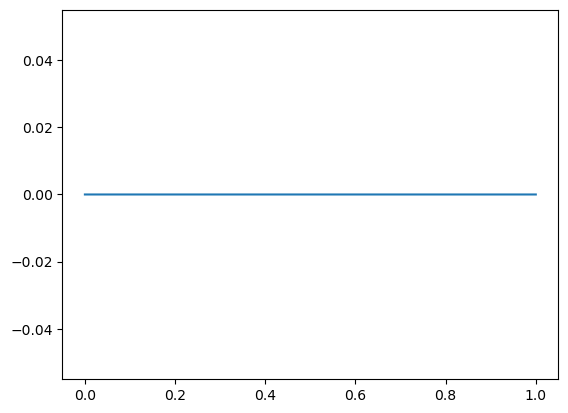

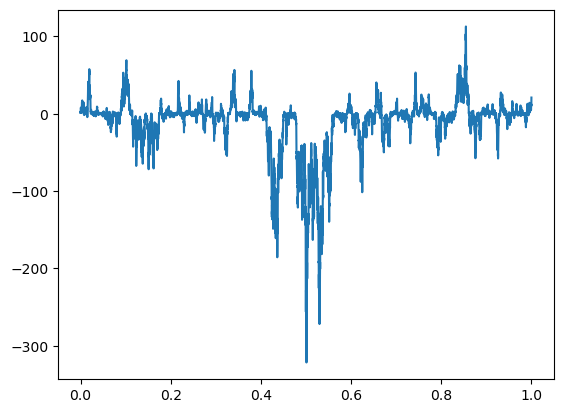

In [8]:
n = 10000
times = np.arange(0, n+1) / n
plt.plot(times, euler_method(x0=-1, n=n))
plt.show()
plt.plot(times, euler_method(x0=0, n=n))
plt.show()
plt.plot(times, euler_method(x0=1, n=n))
plt.show()

Схема Мільштейна:
$Y_{t_k} = Y_{t_{k-1}} + 2Y_{t_{k-1}}(t_k - t_{k-1}) + \sqrt{Y_{t_{k-1}}}\xi_k + ((\xi_k)^2 - (t_k - t_{k-1}))/4$

In [9]:
def milstein_method(x0, n):
    y = np.empty(n+1)
    y[0] = x0
    d = 1 / n
    for j in range(1, n+1):
        w = np.random.normal(loc=0, scale=1, size=1)
        # abs(...) у разі початкового значення x0 < 0
        y_euler = y[j-1] + 2 * y[j-1] * d + np.sqrt(np.abs(y[j-1])) * w
        y[j] = y_euler + (w ** 2 - d) / 4
    return y

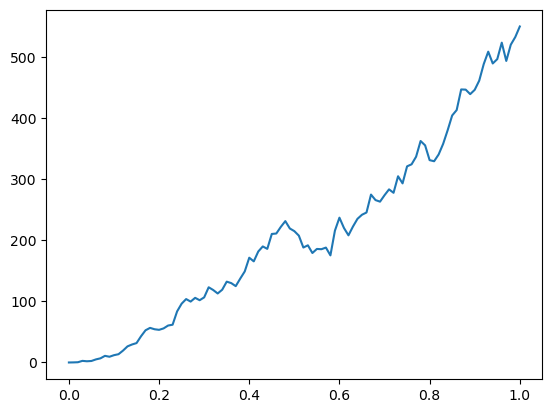

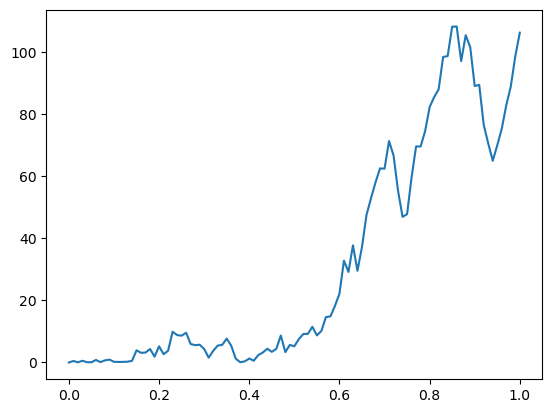

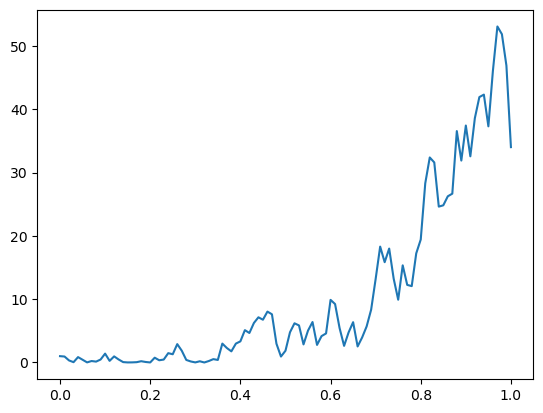

In [10]:
n = 100
times = np.arange(0, n+1) / n
plt.plot(times, milstein_method(x0=-1, n=n))
plt.show()
plt.plot(times, milstein_method(x0=0, n=n))
plt.show()
plt.plot(times, milstein_method(x0=1, n=n))
plt.show()

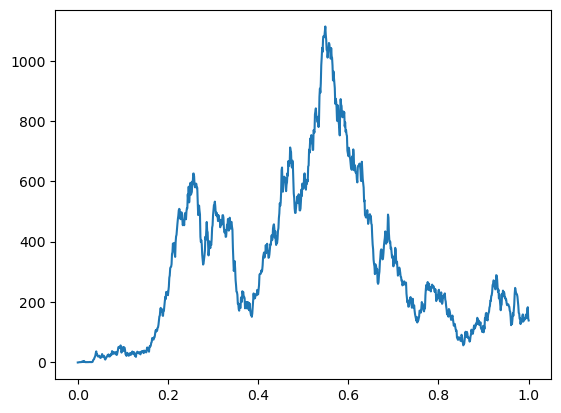

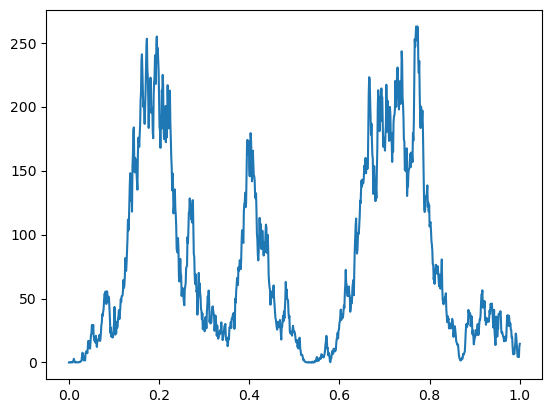

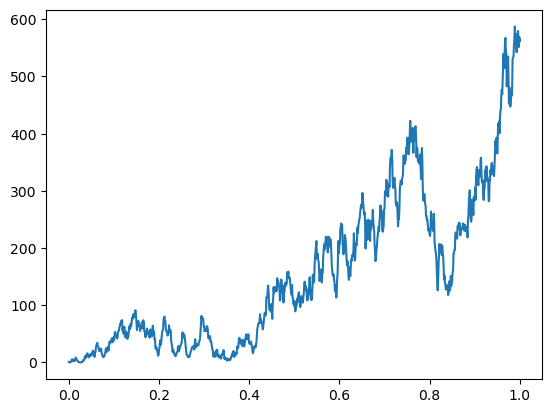

In [11]:
n = 1000
times = np.arange(0, n+1) / n
plt.plot(times, milstein_method(x0=-1, n=n))
plt.show()
plt.plot(times, milstein_method(x0=0, n=n))
plt.show()
plt.plot(times, milstein_method(x0=1, n=n))
plt.show()

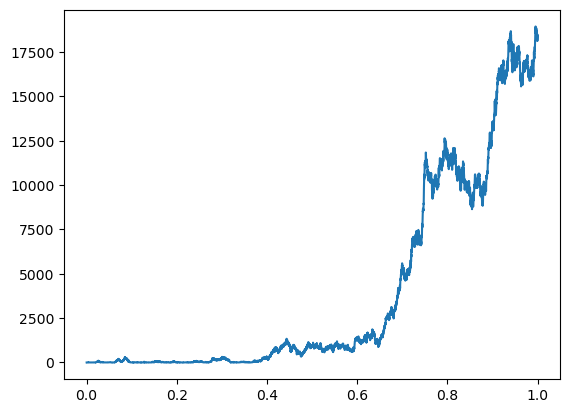

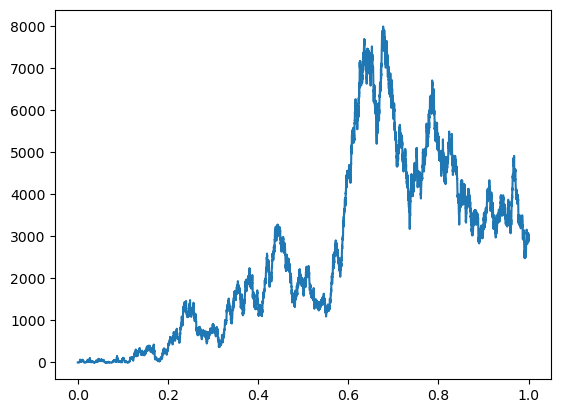

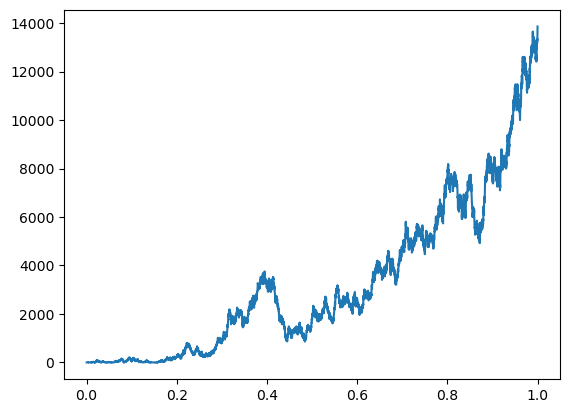

In [12]:
n = 10000
times = np.arange(0, n+1) / n
plt.plot(times, milstein_method(x0=-1, n=n))
plt.show()
plt.plot(times, milstein_method(x0=0, n=n))
plt.show()
plt.plot(times, milstein_method(x0=1, n=n))
plt.show()

Для моделювання розв'язку не вручну, скористаємося вбудованими функціями в R.

In [15]:
# !pip install rpy2

In [16]:
%load_ext rpy2.ipython

In [25]:
%%R
library('sde')
set.seed(999887)
# Коефіцієнти заданого рівняння
b <- expression(2 * x)
s <- expression(sqrt(abs(x)))
# Похідна коефіцієнта дифузії, потрібно для наближення Мільштейна
s.deriv <- expression(1 / (2 * sqrt(abs(x))))

R[write to console]: 
T set to = 1.000000


R[write to console]: 
T set to = 1.000000




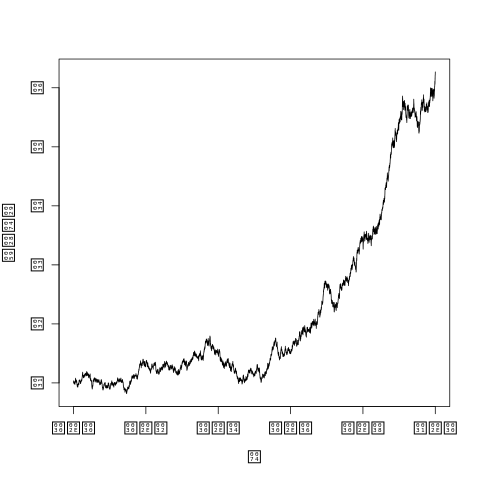

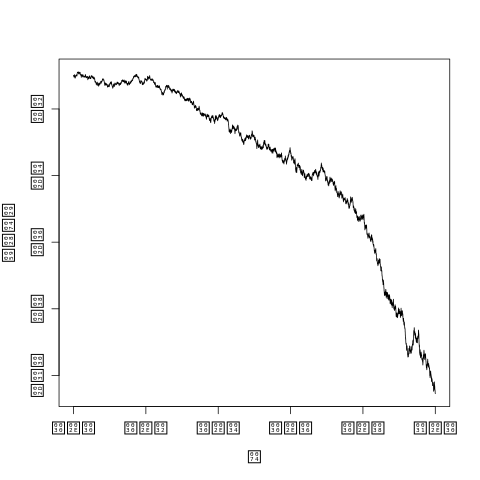

In [32]:
%%R
y.mod <- sde.sim(
    N = 10000, delta = 1 / 10000, X0 = 1,
    drift = b, sigma = s, sigma.x = s.deriv,
    method = "euler"
    )
plot(y.mod, xlab="t", ylab="Y(t)")
y.mod <- sde.sim(
    N = 10000, delta = 1 / 10000, X0 = -1,
    drift = b, sigma = s, sigma.x = s.deriv,
    method = "euler"
    )
plot(y.mod, xlab="t", ylab="Y(t)")

R[write to console]: 
T set to = 1.000000


R[write to console]: 
T set to = 1.000000




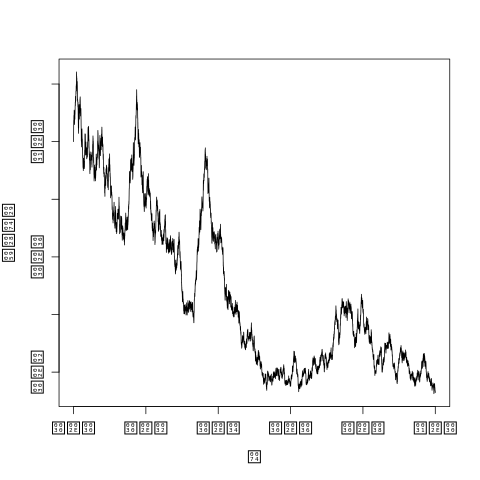

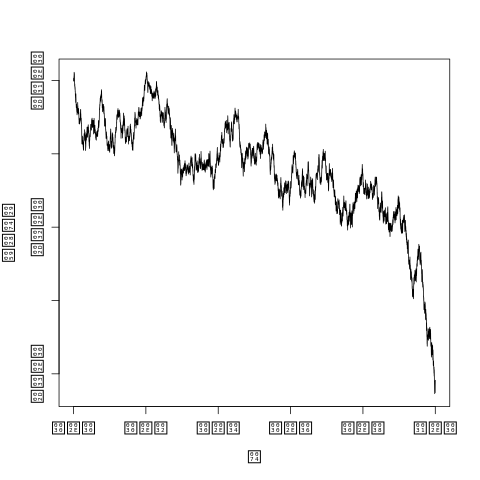

In [33]:
%%R
y.mod <- sde.sim(
    N = 10000, delta = 1 / 10000, X0 = 1,
    drift = b, sigma = s, sigma.x = s.deriv,
    method = "milstein"
    )
plot(y.mod, xlab="t", ylab="Y(t)")
y.mod <- sde.sim(
    N = 10000, delta = 1 / 10000, X0 = -1,
    drift = b, sigma = s, sigma.x = s.deriv,
    method = "milstein"
    )
plot(y.mod, xlab="t", ylab="Y(t)")